In [15]:
import pandas as pd
import json
import pickle
from pathlib import Path
from pprint import pprint
import matplotlib.pyplot as plt
from statistics import mean

from src.benchmark.terminal_bench_V1.analytics.utils import collect_and_concat_tb_logs_and_agentu_logs
from src.benchmark.terminal_bench_V1.analytics.utils import plot_comparing_multiple_runs_two_attributes
from src.benchmark.terminal_bench_V1.analytics.utils import plot_multi_comparing_runs_two_attributes
from src.benchmark.terminal_bench_V1.analytics.utils import plot_task_correctness_colored_bars
from src.benchmark.terminal_bench_V1.analytics.utils import calc_stats


#### for the given runs -> check which tasks where solved by how many runs

In [16]:
run_ids = [
    'results_tb_run_7_singleton_gpt-5-mini_40_070925',
    'results_tb_run_8_mas-group-chat-s_gpt-5-mini_40_080925',
    'results_tb_run_9_mas-group-chat-m_gpt-5-mini_40_090925',
    #'results_tb_run_6_singleton_gpt-oss-20b_40_070925',
    #'results_tb_run_10_mas-group-chat-s_gpt-oss-20b_40_090925',
    #'results_tb_run_11_mas-group-chat-m_gpt-oss-20b_40_090925',
]

In [17]:
logs = [collect_and_concat_tb_logs_and_agentu_logs(r) for r in run_ids]
# print example logs dict entry
pprint([l for l in logs[0].values() if l['task_id'] == 'hello-world'])


-- collecting and concatenating results_tb_run_7_singleton_gpt-5-mini_40_070925 logs
-> tb results number of collected results: 40 (resolved: 14; unresolved: 26)
-> agentu results number of collected results: 40
-> concatenated logs number of collected results: 40
-> concatenated logs: 40 matches; 0 no matches

-- collecting and concatenating results_tb_run_8_mas-group-chat-s_gpt-5-mini_40_080925 logs
-> tb results number of collected results: 40 (resolved: 16; unresolved: 24)
-> agentu results number of collected results: 40
-> concatenated logs number of collected results: 40
-> concatenated logs: 40 matches; 0 no matches

-- collecting and concatenating results_tb_run_9_mas-group-chat-m_gpt-5-mini_40_090925 logs
-> tb results number of collected results: 40 (resolved: 18; unresolved: 22)
-> agentu results number of collected results: 40
-> concatenated logs number of collected results: 40
-> concatenated logs: 40 matches; 0 no matches
[{'agent': 'singleton',
  'agent_usage_stats': 

#### 

#### accuracy vs costs/complexity plot

In [18]:
logs[0]

{'super-benchmark-upet': {'task_id': 'super-benchmark-upet',
  'instruction': 'Train a roberta-base model on the RTE dataset using the UPET method with the `run.py` script. Report eval accuracy as a json structured as follows: {"eval_accuracy": 0.0} (replace 0.0 with the actual value).\n\nAdditional instructions:\n1. Run for only 1 epoch. 2. Set 5 examples per label, seed=42, and other hyperparameters taken from the example in the repository readme file.\n\nGit repository: https://github.com/wjn1996/UPET\nCommit hash: 4701c3c62441077cc44a6553bf6ae909d99b8351',
  'is_resolved': False,
  'failure_mode': 'unknown_agent_error',
  'total_input_tokens': 2258085,
  'total_output_tokens': 15986,
  'task': 'Train_a_roberta_base_model_on_the_RTE_da_877b',
  'success': None,
  'agent': 'singleton',
  'model': 'gpt-5-mini',
  'vague_description': None,
  'eval_out': None,
  'agent_usage_stats': {'user_interactions_count': 2,
   'llm_calls_count': 74,
   'tool_call_counts': {'Shell': 73},
   'ollam

In [19]:
stats = [calc_stats(logs) for l in logs]

KeyError: 'is_resolved'

### static accuracy plots

In [ ]:
acc_c_plot_data = [  # gpt-5-mini runs
    {
        "label": "Singleton", 
        "accuracy": [0.25, 0.2375, 0.275], 
        "mean_total_prompt_tokens": [100341, 124589, 103554], 
        "mean_total_output_tokens": [4068, 5367, 4967], 
        "mean_llm_calls": [23, 21, 20], 
        "mean_exec_time_min": [13.9, 12.1, 15.1]
    },
    {
        "label": "MAS-S", 
        "accuracy": [0.225, 0.2375, 0.25], 
        "mean_total_prompt_tokens": [105123, 173856, 135850], 
        "mean_total_output_tokens": [6513, 5068, 5554], 
        "mean_llm_calls": [27, 30, 31], 
        "mean_exec_time_min": [14.8, 14.1, 16.1]
    },
    {
        "label": "MAS-M", 
        "accuracy": [0.225, 0.225, 0.2125], 
        "mean_total_prompt_tokens": [129345, 167890, 159496], 
        "mean_total_output_tokens": [5931, 5656, 5837], 
        "mean_llm_calls": [36, 40, 35], 
        "mean_exec_time_min": [17.5, 18.7, 15.9]
    },
    {
        "label": "MAS-L", 
        "accuracy": [0.225, 0.2, 0.215], 
        "mean_total_prompt_tokens": [259345, 217890, 169496], 
        "mean_total_output_tokens": [6930, 7654, 5934], 
        "mean_llm_calls": [46, 41, 38], 
        "mean_exec_time_min": [19.5, 22.7, 20.9]
    },
    {
        "label": "MAS-Supervisor", 
        "accuracy": [0.24, 0.25, 0.265], 
        "mean_total_prompt_tokens": [269345, 437890, 369496], 
        "mean_total_output_tokens": [7456, 7156, 6542], 
        "mean_llm_calls": [46, 42, 44], 
        "mean_exec_time_min": [18.5, 25.7, 22.9]
    }
]

plot_multi_comparing_runs_two_attributes(
    acc_c_plot_data, 
    [("accuracy", ), ("mean_llm_calls", "mean_total_output_tokens"), ("mean_exec_time_min", "mean_total_prompt_tokens")],
    "accuracy vs costs",
    [(0, 1), (0, None), (0, None)]
)

In [ ]:
acc_c_plot_data = [  # gpt-5-mini runs
    {
        "label": "Singleton", 
        "accuracy": [0.35, 0.365, 0.30], 
        "mean_total_prompt_tokens": [305935, 315549, 280076], 
        "mean_total_output_tokens": [9983, 10123, 8567], 
        "mean_llm_calls": [23, 25, 23], 
        "mean_exec_time_min": [5.8, 5.1, 7.1]
    },
    {
        "label": "MAS-S", 
        "accuracy": [0.4, 0.375, 0.42], 
        "mean_total_prompt_tokens": [593289, 563578, 623866], 
        "mean_total_output_tokens": [18927, 19347, 17112], 
        "mean_llm_calls": [39, 30, 32], 
        "mean_exec_time_min": [12.3, 12.1, 10.1]
    },
    {
        "label": "MAS-M", 
        "accuracy": [0.42, 0.4125, 0.4075], 
        "mean_total_prompt_tokens": [850395, 892345, 802345], 
        "mean_total_output_tokens": [31811, 28319, 39432], 
        "mean_llm_calls": [50, 51, 53], 
        "mean_exec_time_min": [17.2, 17.7, 13.9]
     },
    {
        "label": "MAS-L", 
        "accuracy": [0.45, 0.4425, 0.4275], 
        "mean_total_prompt_tokens": [950395, 1012334, 992641], 
        "mean_total_output_tokens": [41811, 38459, 49534], 
        "mean_llm_calls": [70, 69, 73], 
        "mean_exec_time_min": [20.2, 17.9, 19.2]
    },
    {
        "label": "MAS-Supervisor", 
        "accuracy": [0.32, 0.30, 0.35], 
        "mean_total_prompt_tokens": [850395, 692345, 702345], 
        "mean_total_output_tokens": [36811, 38319, 29432], 
        "mean_llm_calls": [41, 51, 39], 
        "mean_exec_time_min": [17.2, 12.9, 15.2]
    }
]

plot_multi_comparing_runs_two_attributes(
    acc_c_plot_data, 
    [("accuracy", ), ("mean_llm_calls", "mean_total_output_tokens"), ("mean_exec_time_min", "mean_total_prompt_tokens")],
    "accuracy vs costs",
    [(0, 1), (0, None), (0, None)]
)

### for each task -> collect how many times it was solved and by which agent system

In [23]:
# for each task -> collect how many times it was solved and by which agent system
task_ids = [t for t in logs[0].keys()]
assert len(task_ids) == len(set(task_ids))

In [24]:
run_labels = ['singleton', 'mas-group-chat-s', 'mas-group-chat-m']
st_to_as = {t: [] for t in task_ids}
for task in task_ids:
    for run_idx, run in enumerate(logs):
        if run[task]['is_resolved']:
            st_to_as[task].append((run_labels[run_idx], run_idx + 1))
list(st_to_as.items())[:7]

[('super-benchmark-upet', []),
 ('play-zork', []),
 ('eval-mteb', [('mas-group-chat-s', 2), ('mas-group-chat-m', 3)]),
 ('swe-bench-astropy-2', []),
 ('run-pdp11-code', []),
 ('swe-bench-astropy-1',
  [('singleton', 1), ('mas-group-chat-s', 2), ('mas-group-chat-m', 3)]),
 ('swe-bench-fsspec', [('mas-group-chat-s', 2)])]

In [25]:
# if it solved by all runs it is "green"
# if it is solved by r-i runs and all i are above all (r-i) in "capability ordering" (eg Singleton is less capable then andy MAS) then it is colored blue
# if it solved by r-i runs and some i are below some (r-i) in "capability ordering" they are colored yellow to orange

def max_correctness_score(solved_by_count: int) -> int:
    m = len(run_labels)
    max_c = 0
    for i in range(solved_by_count):
        max_c += m - i
    return max_c

for task, solved_by in st_to_as.items():
    solved_by_sum = sum([a[1] for a in solved_by])
    solved_by_count = len(solved_by)
    solved_correctness =  solved_by_sum / max_correctness_score(solved_by_count) if solved_by_sum > 0 else 0
    st_to_as[task] = (solved_by_sum, solved_by_count, solved_correctness, solved_by)

list(st_to_as.items())[:10]

[('super-benchmark-upet', (0, 0, 0, [])),
 ('play-zork', (0, 0, 0, [])),
 ('eval-mteb',
  (5, 2, 1.0, [('mas-group-chat-s', 2), ('mas-group-chat-m', 3)])),
 ('swe-bench-astropy-2', (0, 0, 0, [])),
 ('run-pdp11-code', (0, 0, 0, [])),
 ('swe-bench-astropy-1',
  (6,
   3,
   1.0,
   [('singleton', 1), ('mas-group-chat-s', 2), ('mas-group-chat-m', 3)])),
 ('swe-bench-fsspec', (2, 1, 0.6666666666666666, [('mas-group-chat-s', 2)])),
 ('blind-maze-explorer-5x5',
  (6,
   3,
   1.0,
   [('singleton', 1), ('mas-group-chat-s', 2), ('mas-group-chat-m', 3)])),
 ('blind-maze-explorer-algorithm.easy',
  (5, 2, 1.0, [('mas-group-chat-s', 2), ('mas-group-chat-m', 3)])),
 ('train-fasttext', (1, 1, 0.3333333333333333, [('singleton', 1)])),
 ('grid-pattern-transform', (3, 1, 1.0, [('mas-group-chat-m', 3)])),
 ('qemu-alpine-ssh', (0, 0, 0, [])),
 ('pytorch-model-cli.hard', (3, 1, 1.0, [('mas-group-chat-m', 3)])),
 ('pytorch-model-cli.easy',
  (4, 2, 0.8, [('singleton', 1), ('mas-group-chat-m', 3)])),
 ('c

In [20]:
# plot
task_solver_correctness_data = dict()
for solved_by in st_to_as.values():
    if solved_by[1] in task_solver_correctness_data:
        task_solver_correctness_data[solved_by[1]].append(solved_by[2])
    else:
        task_solver_correctness_data[solved_by[1]] = [solved_by[2]]
for count in task_solver_correctness_data.keys():
    task_solver_correctness_data[count].sort()
assert sum([len(v) for v in task_solver_correctness_data.values()]) == len(task_ids)
task_solver_correctness_data

{0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 2: [0.6, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 1: [0.3333333333333333, 0.6666666666666666, 1.0, 1.0]}

In [21]:
task_solver_correctness_data = {
    0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    1: [0.3333333333333333, 1.0, 1.0],
    2: [0.6666666666666666, 0.6666666666666666, 1.0, 1.0, 1.0],
    3: [0.6, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0],
    4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
}

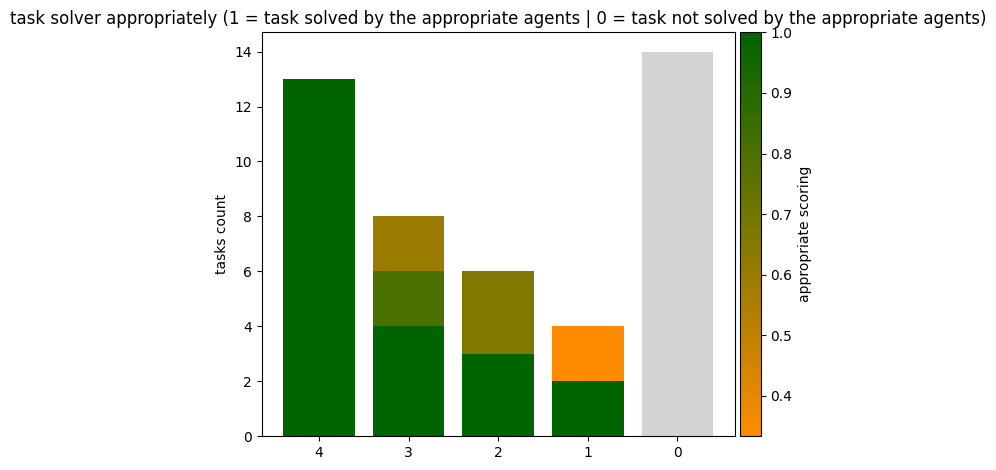

In [22]:
# vmin: solved only by the simplest agent
plot_task_correctness_colored_bars(task_solver_correctness_data, vmin=1 / len(run_labels), vmax=1, edge=False)